In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the JSON data
json_path = './image_v2_data.json'
with open(json_path) as f:
    json_data = json.load(f)

# Initialize dictionaries to hold QR detection and verification data
qr_detect_data = {}
qr_verify_data = {}

# Process qr_detect.txt
text_1_path = './qr_detect.txt'
with open(text_1_path) as f:
    for line in f:
        parts = line.split()
        if len(parts) >= 2:
            status, filename = parts[0], parts[1]
            filename = filename.split('.')[0]
            qr_detect_data[filename] = status == 'TRUE'

# Process qr_verify.txt
text_2_path = './qr_verify.txt'
with open(text_2_path) as f:
    for line in f:
        parts = line.split()
        if len(parts) >= 2:
            status, filename = parts[0], parts[1]
            filename = filename.split('.')[0]
            qr_verify_data[filename] = status == 'SCAN'

# Update the JSON data with qr_detect and qr_verify information
for item in json_data:
    filename = item  # Assuming the key is the filename
    json_data[item]['qr_detect_val'] = qr_detect_data.get(filename, False)
    json_data[item]['qr_verify_val'] = qr_verify_data.get(filename, False)

# Convert the updated JSON data into a DataFrame
df = pd.DataFrame.from_dict(json_data, orient='index')
df['conditioning_scale'] = df['conditioning_scale'].round(3)

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Process data for images_v3
json_path = './image_v3_data.json'
with open(json_path) as f:
    json_data = json.load(f)

# Initialize dictionaries to hold QR detection and verification data
qr_detect_data = {}
qr_verify_data = {}

# Process qr_verify.txt
text_2_path = './qr_verify3.txt'
with open(text_2_path) as f:
    for line in f:
        parts = line.split()
        if len(parts) >= 2:
            status, filename = parts[0], parts[1]
            filename = filename.split('.')[0]
            qr_verify_data[filename] = status == 'SCAN'

# Update the JSON data with qr_detect and qr_verify information
for item in json_data:
    filename = item  # Assuming the key is the filename
    json_data[item]['qr_detect_val'] = qr_detect_data.get(filename, False)
    json_data[item]['qr_verify_val'] = qr_verify_data.get(filename, False)

# Convert the updated JSON data into a DataFrame
df = pd.DataFrame.from_dict(json_data, orient='index')
df['conditioning_scale'] = df['conditioning_scale'].round(3)

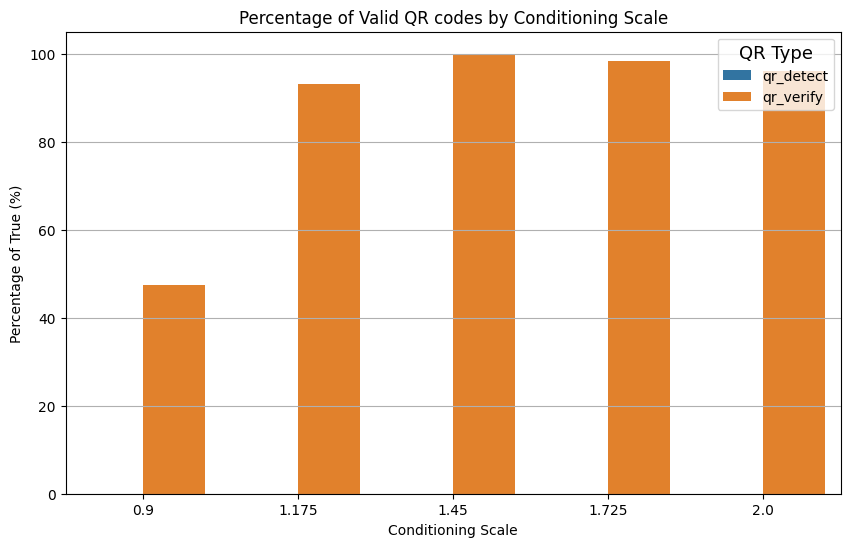

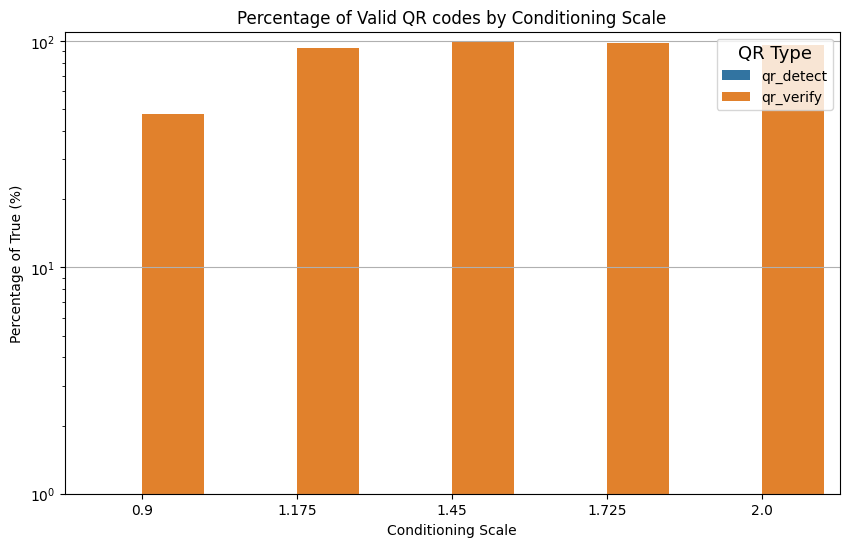

In [ ]:
percentage_df = df.groupby('conditioning_scale').agg(
    qr_detect=('qr_detect_val', lambda x: (x.mean()) * 100),
    qr_verify=('qr_verify_val', lambda x: (x.mean()) * 100)
).reset_index()

# Melting the DataFrame for easier plotting
percentage_df_melted = percentage_df.melt(id_vars=['conditioning_scale'],
                                          value_vars=['qr_detect', 'qr_verify'],
                                          var_name='QR Scanner', value_name='Percentage')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='conditioning_scale', y='Percentage', hue='QR Scanner', data=percentage_df_melted)
plt.xlabel('Conditioning Scale')
plt.ylabel('Percentage of True (%)')
plt.title('Percentage of Valid QR codes by Conditioning Scale')
plt.legend(title='QR Type', title_fontsize='13', loc='upper right')
plt.grid(axis='y')

plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='conditioning_scale', y='Percentage', hue='QR Scanner', data=percentage_df_melted)
plt.xlabel('Conditioning Scale')
plt.ylabel('Percentage of True (%)')
plt.title('Percentage of Valid QR codes by Conditioning Scale')
plt.legend(title='QR Type', title_fontsize='13', loc='upper right')
plt.grid(axis='y')

# Apply logarithmic scale
plt.yscale('log')
plt.ylim(1, 110)  # Adjust as needed to ensure visibility of lower values

plt.show()

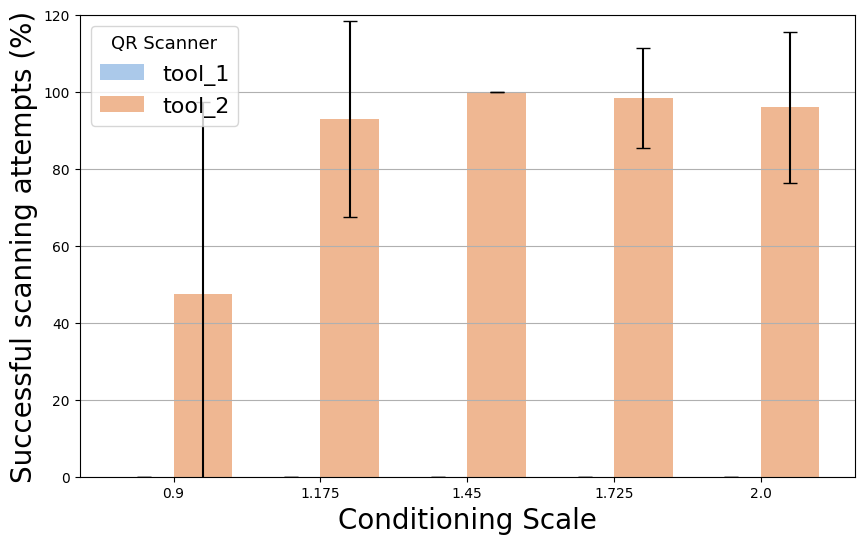

In [ ]:
agg_df = df.groupby('conditioning_scale').agg(
    qr_detect_mean=('qr_detect_val', lambda x: np.mean(x) * 100),
    qr_detect_std=('qr_detect_val', lambda x: np.std(x, ddof=0) * 100),  # Multiply by 100 to convert to percentage
    qr_verify_mean=('qr_verify_val', lambda x: np.mean(x) * 100),
    qr_verify_std=('qr_verify_val', lambda x: np.std(x, ddof=0) * 100)  # ddof=0 for population std deviation
).reset_index()

# Melting the DataFrame for easier plotting, including std values
melted_df = pd.melt(agg_df, id_vars=['conditioning_scale'],
                    value_vars=['qr_detect_mean', 'qr_verify_mean'],
                    var_name='QR Type', value_name='Percentage')

# Adding std deviation columns for yerr
melted_df['std'] = pd.concat([agg_df['qr_detect_std'], agg_df['qr_verify_std']]).reset_index(drop=True)

# Adjust the QR Type values for clearer legend naming
melted_df['QR Type'] = melted_df['QR Type'].replace({'qr_detect_mean': 'tool_1', 'qr_verify_mean': 'tool_2'})

# Plotting with yerr
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='conditioning_scale', y='Percentage', hue='QR Type', data=melted_df, capsize=.1, palette='pastel')
# Extract unique conditioning scales and their respective standard deviations for error bars
for i, scale in enumerate(agg_df['conditioning_scale'].unique()):
    subset = melted_df[melted_df['conditioning_scale'] == scale]
    # Error bars for qr_detect
    plt.errorbar(i - 0.2, subset[subset['QR Type'] == 'tool_1']['Percentage'].values[0],
                 yerr=subset[subset['QR Type'] == 'tool_1']['std'].values[0], fmt='none', capsize=5, color='black')
    # Error bars for qr_verify
    plt.errorbar(i + 0.2, subset[subset['QR Type'] == 'tool_2']['Percentage'].values[0],
                 yerr=subset[subset['QR Type'] == 'tool_2']['std'].values[0], fmt='none', capsize=5, color='black')

plt.xlabel('Conditioning Scale', fontsize=20)
plt.ylabel('Successful scanning attempts (%)', fontsize=20)
# plt.title('Percentage of Valid QR code with Standard Deviation by Conditioning Scale')
plt.legend(title='QR Scanner', title_fontsize='13', loc='upper left',fontsize=16)
plt.grid(axis='y')
plt.ylim(0, 120)

plt.show()

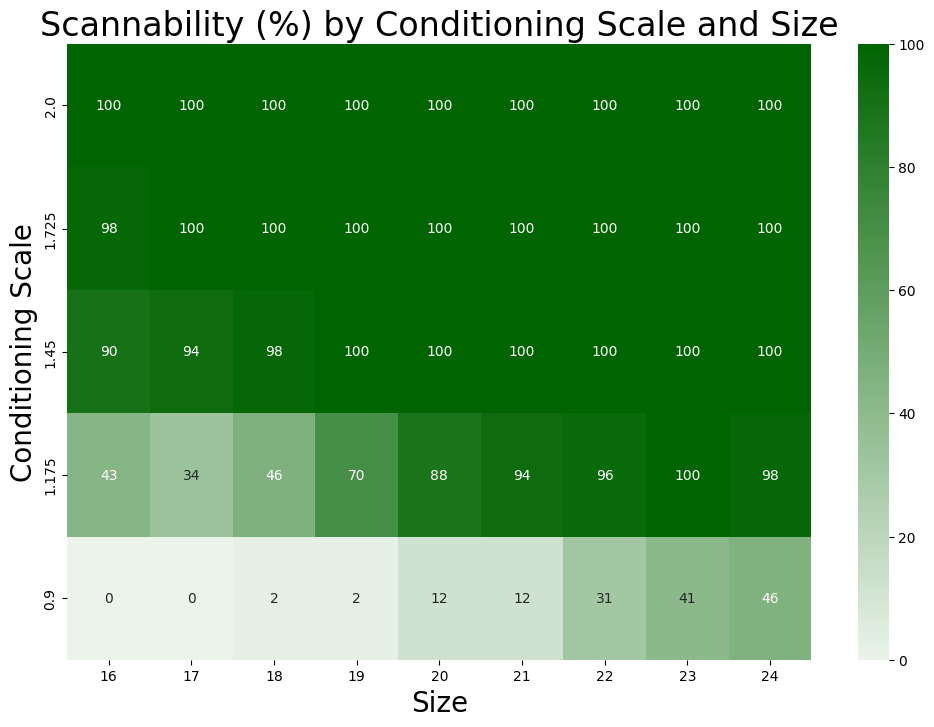

In [ ]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
from seaborn.palettes import light_palette

json_path = './image_v2_scan_data.json'
json_data = {}

with open(json_path) as f:
  json_data = json.load(f)

# Name which field you want
x_label = 'size'
x_plot_label = 'Size'

conditioning_scales = []
x = []
scanability = []
prompts = []
for filename, data in json_data.items():
  prompts.append(data['prompt'])
  conditioning_scales.append(round(data['conditioning_scale'], 3))
  x.append(data[x_label])
  scanability.append(True if data['scan_test'] == 'SCAN' else False)

joined = [list(item) for item in zip(conditioning_scales, x, scanability)]

df = pd.DataFrame(joined, columns=['conditioning_scale', x_label, 'result'])

grouped = df.groupby(['conditioning_scale', x_label]).agg(
    total=('result', 'count'), # Count the total number of records for each group
    true_count=('result', lambda x: (x==True).sum())
).reset_index()

# Step 2: Calculate percentage of True values
grouped['true_percentage'] = grouped['true_count'] / grouped['total'] * 100

# Pivot for heatmap
pivot_table = grouped.pivot(index='conditioning_scale', columns=x_label, values='true_percentage')

# Generate a light to dark green palette
palette = light_palette("darkgreen", as_cmap=True, reverse=True)
custom_cmap = LinearSegmentedColormap.from_list("custom_yg", palette(np.linspace(1, 0,256 )))

# Plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, cmap=custom_cmap, annot=True, fmt=".0f")
ax.invert_yaxis()

plt.title('Scannability (%) by Conditioning Scale and ' + x_plot_label, fontsize=24)
plt.ylabel('Conditioning Scale', fontsize=20)
plt.xlabel(x_plot_label, fontsize=20)

# Show the plot
plt.show()

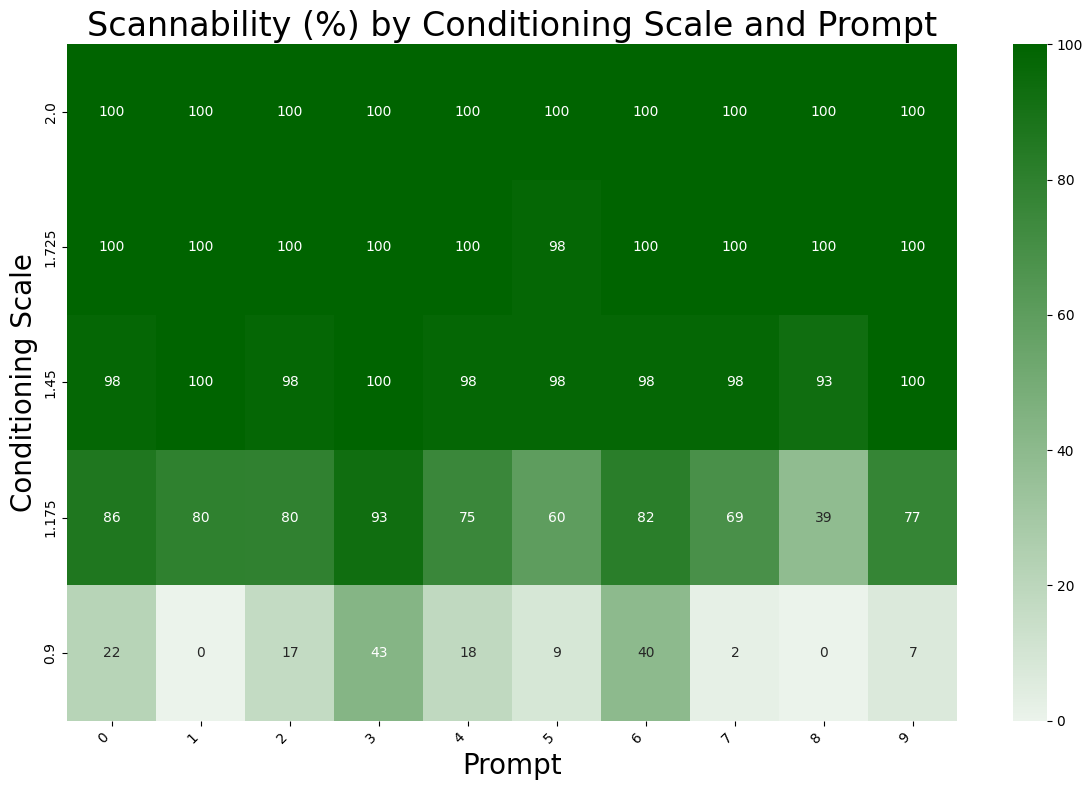

In [ ]:
json_path = './image_v2_scan_data.json'
json_data = {}

with open(json_path) as f:
  json_data = json.load(f)

# Name which field you want
x_label = 'prompt'
x_plot_label = 'Prompt'

conditioning_scales = []
x = []
scanability = []
prompts = []
for filename, data in json_data.items():
  prompts.append(data['prompt'])
  conditioning_scales.append(round(data['conditioning_scale'], 3))
  x.append(data[x_label])
  scanability.append(True if data['scan_test'] == 'SCAN' else False)

# Map each prompt to an integer
prompt_to_int = {prompt: i for i, prompt in enumerate(sorted(set(prompts)))}

# Update 'x' with mapped integers
x_mapped = [prompt_to_int[prompt] for prompt in x]

joined = [list(item) for item in zip(conditioning_scales, x_mapped, scanability)]

df = pd.DataFrame(joined, columns=['conditioning_scale', x_label, 'result'])

grouped = df.groupby(['conditioning_scale', x_label]).agg(
    total=('result', 'count'), # Count the total number of records for each group
    true_count=('result', lambda x: (x==True).sum())
).reset_index()

# Calculate percentage of True values
grouped['true_percentage'] = grouped['true_count'] / grouped['total'] * 100

# Pivot for heatmap
pivot_table = grouped.pivot(index='conditioning_scale', columns=x_label, values='true_percentage')

# Generate a light to dark green palette
palette = light_palette("darkgreen", as_cmap=True, reverse=True)
custom_cmap = LinearSegmentedColormap.from_list("custom_yg", palette(np.linspace(1, 0,256 )))

# Plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, cmap=custom_cmap, annot=True, fmt=".0f")
ax.invert_yaxis()

plt.title('Scannability (%) by Conditioning Scale and ' + x_plot_label, fontsize=24)
plt.ylabel('Conditioning Scale', fontsize=20)
plt.xlabel(x_plot_label, fontsize=20)

# Update x-axis labels to show only integer mappings without prompts
plt.xticks(ticks=np.arange(len(prompt_to_int)) + 0.5, labels=[f"{i}" for i in range(len(prompt_to_int))], rotation=45, ha="right")

plt.tight_layout()
# Show the plot
plt.show()


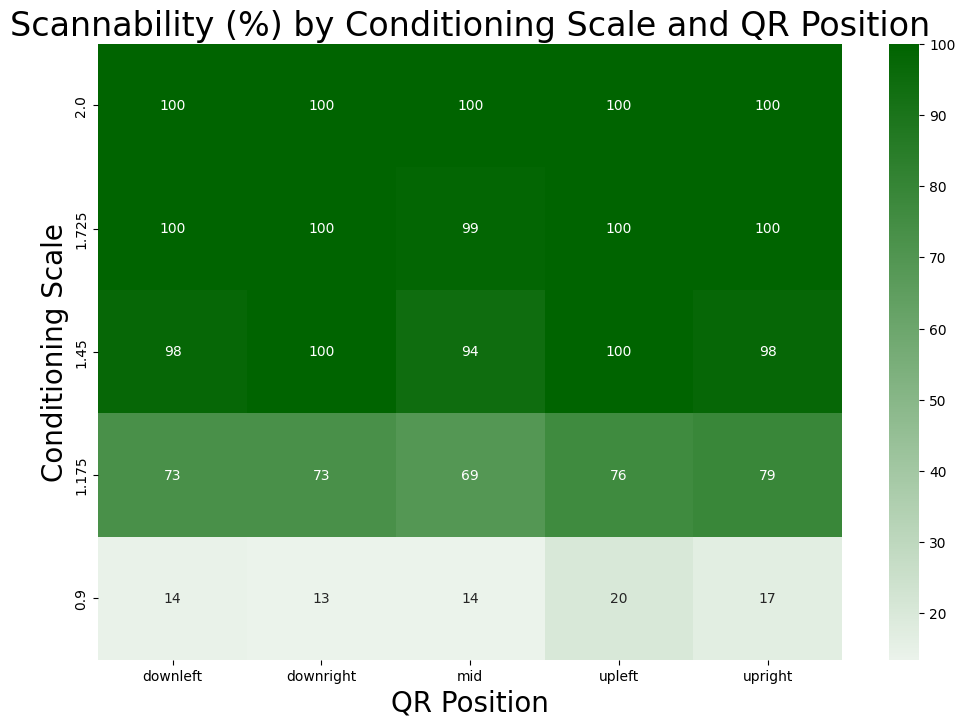

In [ ]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
from seaborn.palettes import light_palette

json_path = './image_v2_scan_data.json'
json_data = {}

with open(json_path) as f:
  json_data = json.load(f)

# Name which field you want
x_label = 'position'
x_plot_label = 'QR Position'

conditioning_scales = []
x = []
scanability = []
prompts = []
for filename, data in json_data.items():
  prompts.append(data['prompt'])
  conditioning_scales.append(round(data['conditioning_scale'], 3))
  x.append(data[x_label])
  scanability.append(True if data['scan_test'] == 'SCAN' else False)

joined = [list(item) for item in zip(conditioning_scales, x, scanability)]

df = pd.DataFrame(joined, columns=['conditioning_scale', x_label, 'result'])

grouped = df.groupby(['conditioning_scale', x_label]).agg(
    total=('result', 'count'), # Count the total number of records for each group
    true_count=('result', lambda x: (x==True).sum())
).reset_index()

# Step 2: Calculate percentage of True values
grouped['true_percentage'] = grouped['true_count'] / grouped['total'] * 100

# Pivot for heatmap
pivot_table = grouped.pivot(index='conditioning_scale', columns=x_label, values='true_percentage')

# Generate a light to dark green palette
palette = light_palette("darkgreen", as_cmap=True, reverse=True)
custom_cmap = LinearSegmentedColormap.from_list("custom_yg", palette(np.linspace(1, 0,256 )))

# Plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, cmap=custom_cmap, annot=True, fmt=".0f")
ax.invert_yaxis()

plt.title('Scannability (%) by Conditioning Scale and ' + x_plot_label, fontsize=24)
plt.ylabel('Conditioning Scale', fontsize=20)
plt.xlabel(x_plot_label, fontsize=20)

# Show the plot
plt.show()

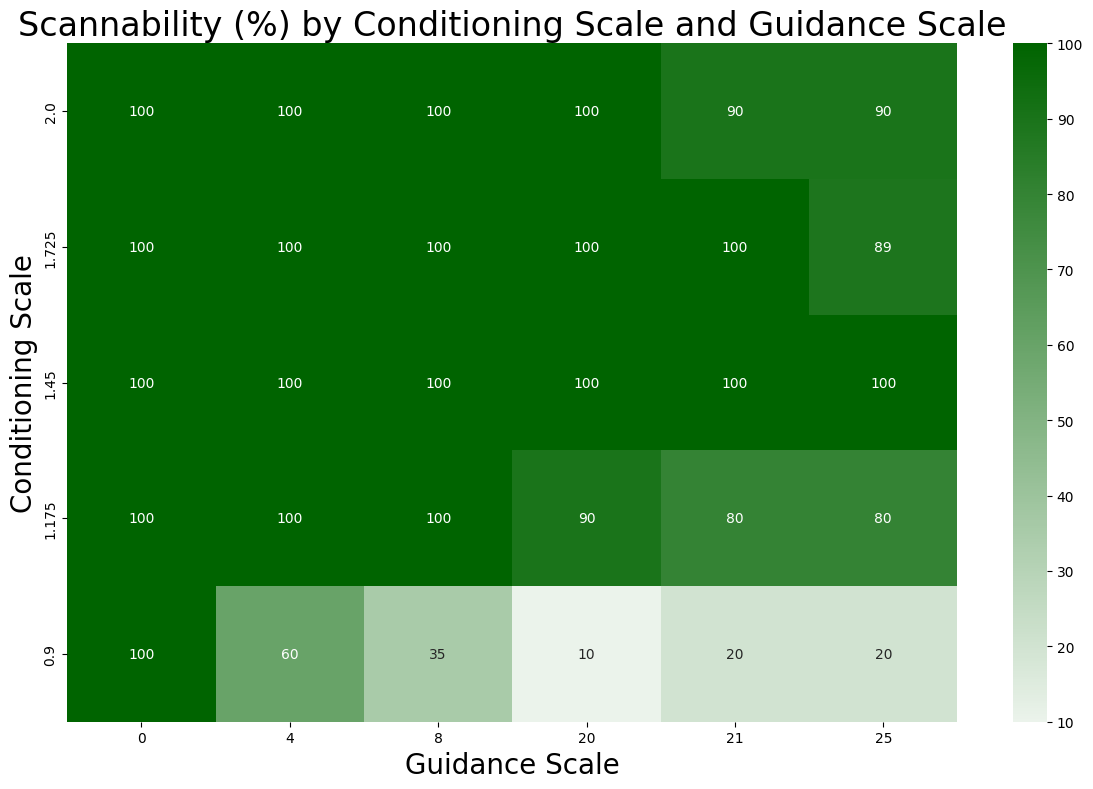

In [9]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from seaborn.palettes import light_palette

# Load JSON data
json_path = './image_v3_data.json'
json_data = {}

with open(json_path) as f:
    json_data = json.load(f)

# Define which field you want
x_label = 'guidance_scale'
x_plot_label = 'Guidance Scale'

# Initialize lists
conditioning_scales = []
x = []
scanability = []
prompts = []

# Populate lists with data
for filename, data in json_data.items():
    prompts.append(data['prompt'])
    conditioning_scales.append(round(data['conditioning_scale'], 3))
    x.append(data[x_label])
    scanability.append(True if data['scan'] == 'SCAN' else False)

joined = list(zip(conditioning_scales, x, scanability))
df = pd.DataFrame(joined, columns=['conditioning_scale', x_label, 'result'])

# Group and calculate true percentage
grouped = df.groupby(['conditioning_scale', x_label]).agg(
    total=('result', 'count'),  # Count the total number of records for each group
    true_count=('result', lambda x: (x==True).sum())
).reset_index()
grouped['true_percentage'] = grouped['true_count'] / grouped['total'] * 100

# Pivot for heatmap
pivot_table = grouped.pivot(index='conditioning_scale', columns=x_label, values='true_percentage')

# Interpolate missing values
pivot_table_interpolated = pivot_table.interpolate(method='linear', axis=0).interpolate(method='linear', axis=1)

# Generate a light to dark green palette
palette = light_palette("darkgreen", as_cmap=True, reverse=True)
custom_cmap = LinearSegmentedColormap.from_list("custom_yg", palette(np.linspace(1, 0, 256)))

# Plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table_interpolated, cmap=custom_cmap, annot=True, fmt=".0f")
ax.invert_yaxis()

plt.title('Scannability (%) by Conditioning Scale and ' + x_plot_label, fontsize=24)
plt.ylabel('Conditioning Scale', fontsize=20)
plt.xlabel(x_plot_label, fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'prompts' is a list of prompt strings
prompts = list(set(prompts))  # Remove duplicates and convert back to list if needed
prompt_to_int = {prompt: i for i, prompt in enumerate(sorted(prompts))}

# Print the mapping
for prompt, integer in prompt_to_int.items():
    print(f"'{integer}': {prompt}")


'0': A bouquet of vibrant flowers with dewdrops on the petals, basking in the morning light. best quality, very detailed
'1': A chalkboard filled with intricate mathematical equations and geometric figures, with a vintage feel. best quality, very detailed
'2': A dynamic pose of a superhero with a flowing cape against a backdrop of a bustling cityscape at night. best quality, very detailed
'3': A gourmet, chef-prepared meal presented elegantly on a white porcelain plate. best quality, very detailed
'4': A scientist in a lab coat conducting an experiment with colorful bubbling test tubes. best quality, very detailed
'5': A sleek, modern computer setup with multiple monitors displaying code and 3D models. best quality, very detailed
'6': A steaming cup of espresso with a delicate foam art on top, on a rustic wooden table. best quality, very detailed
'7': A vibrant canvas showcasing a fusion of different art styles inspired by various famous artists. best quality, very detailed
'8': An abs

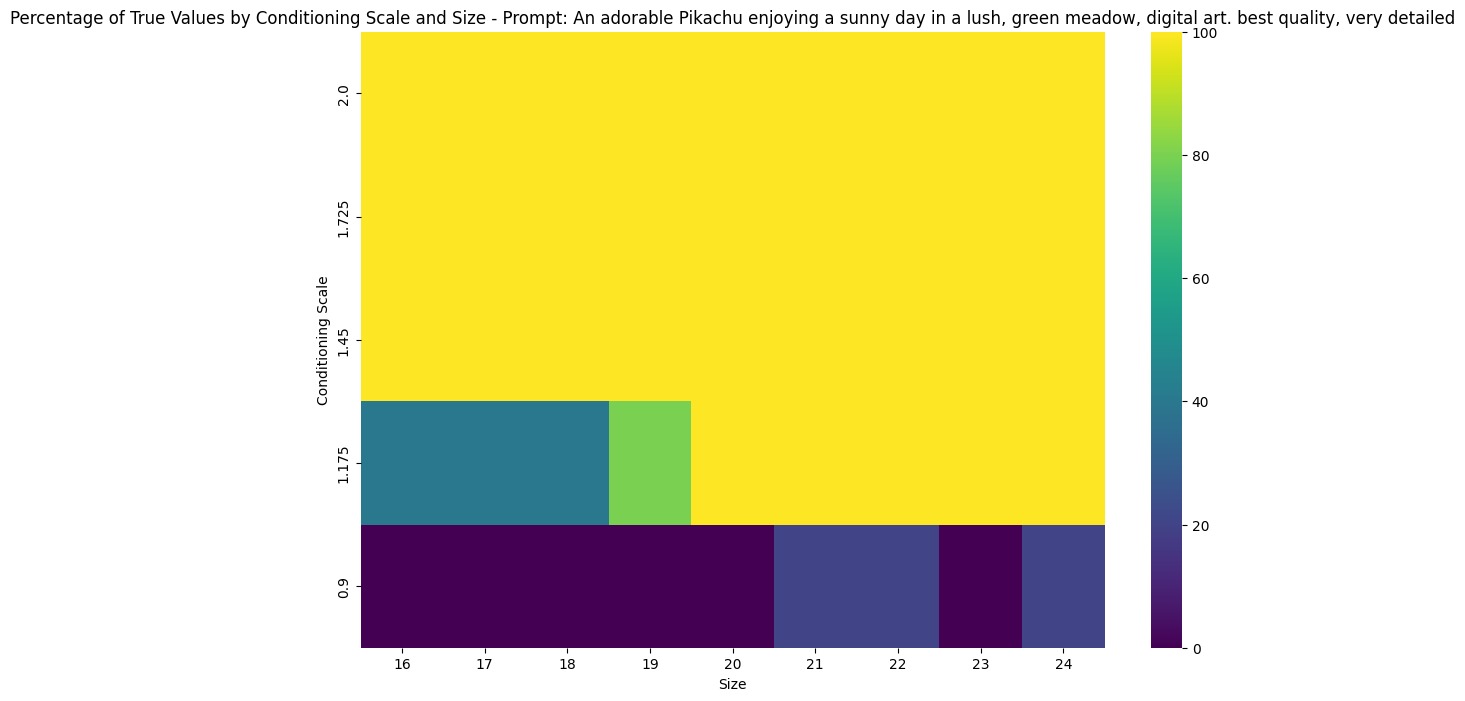

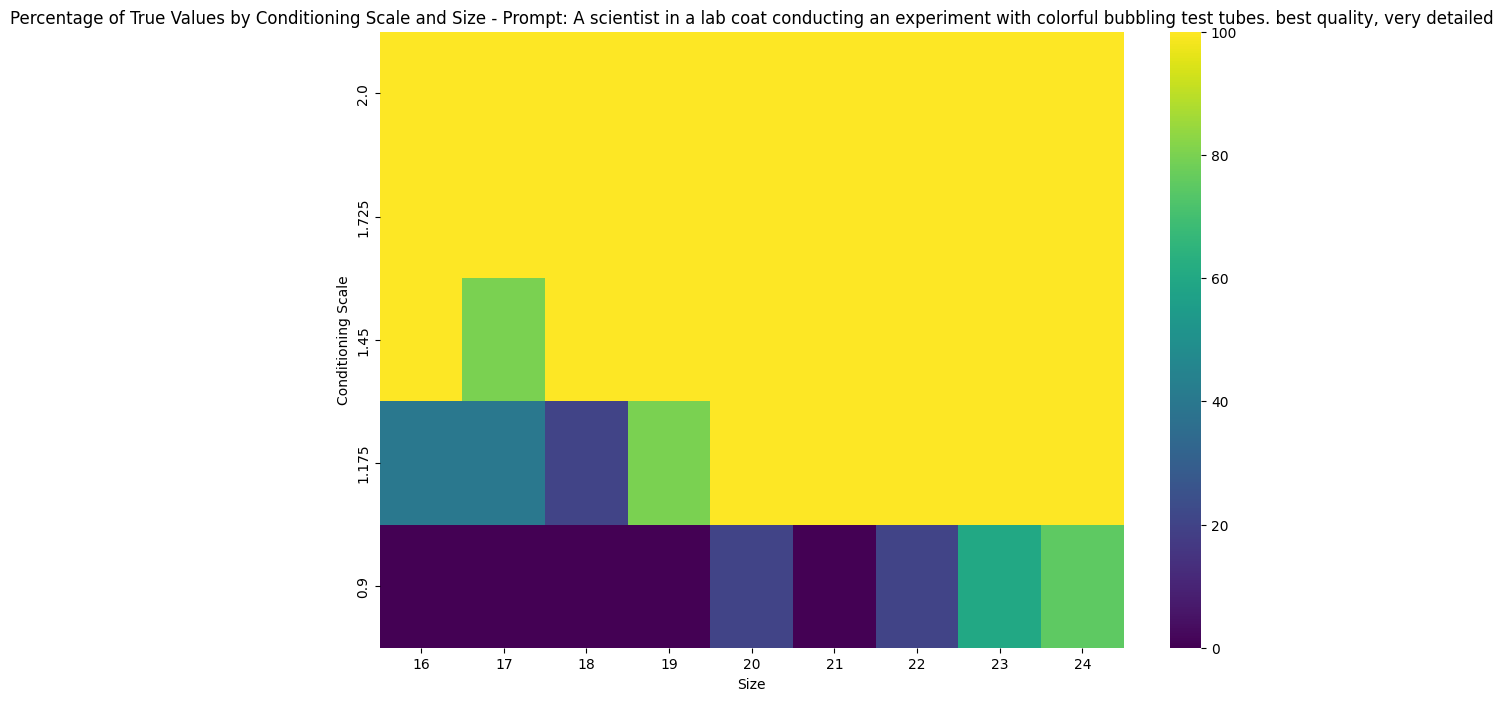

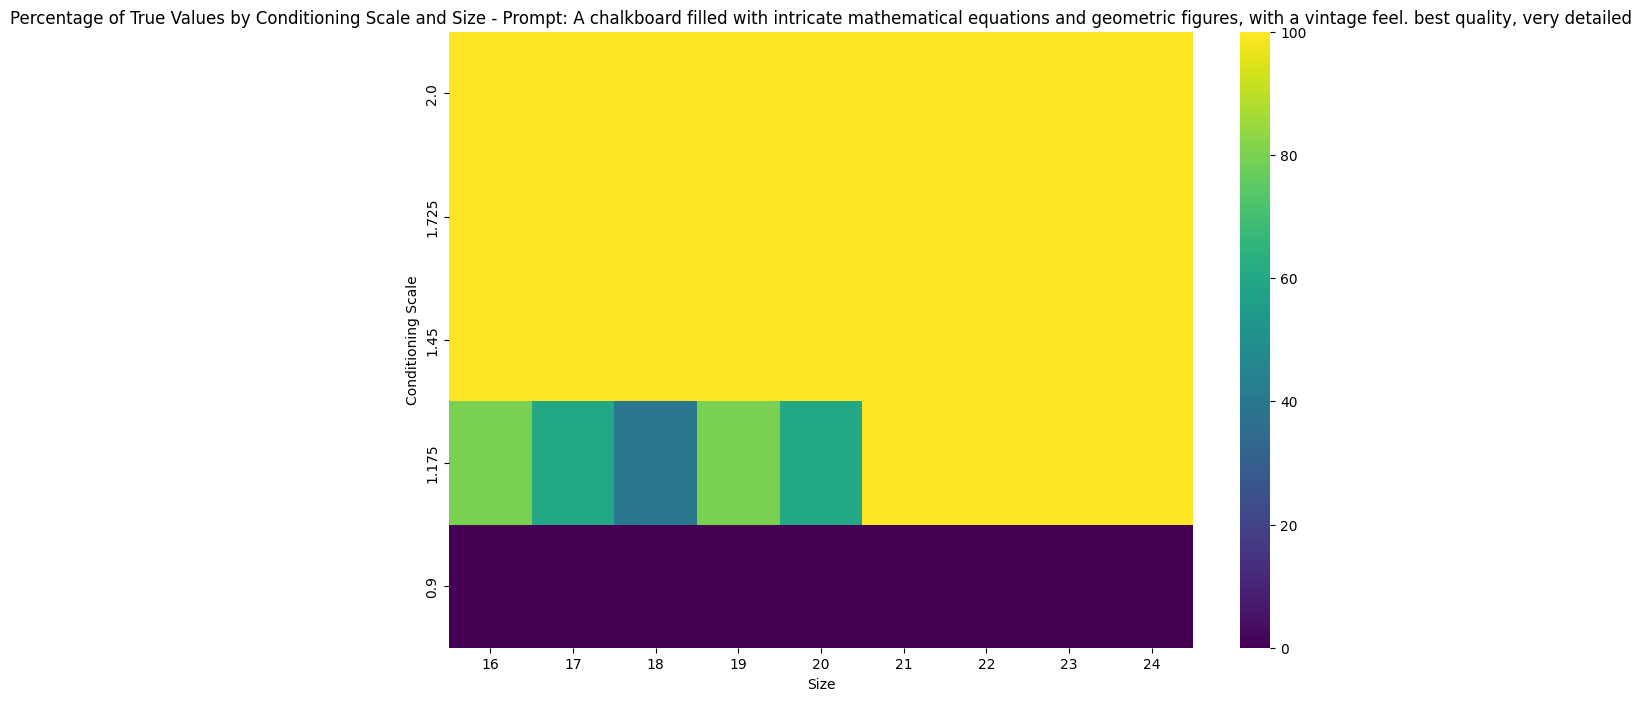

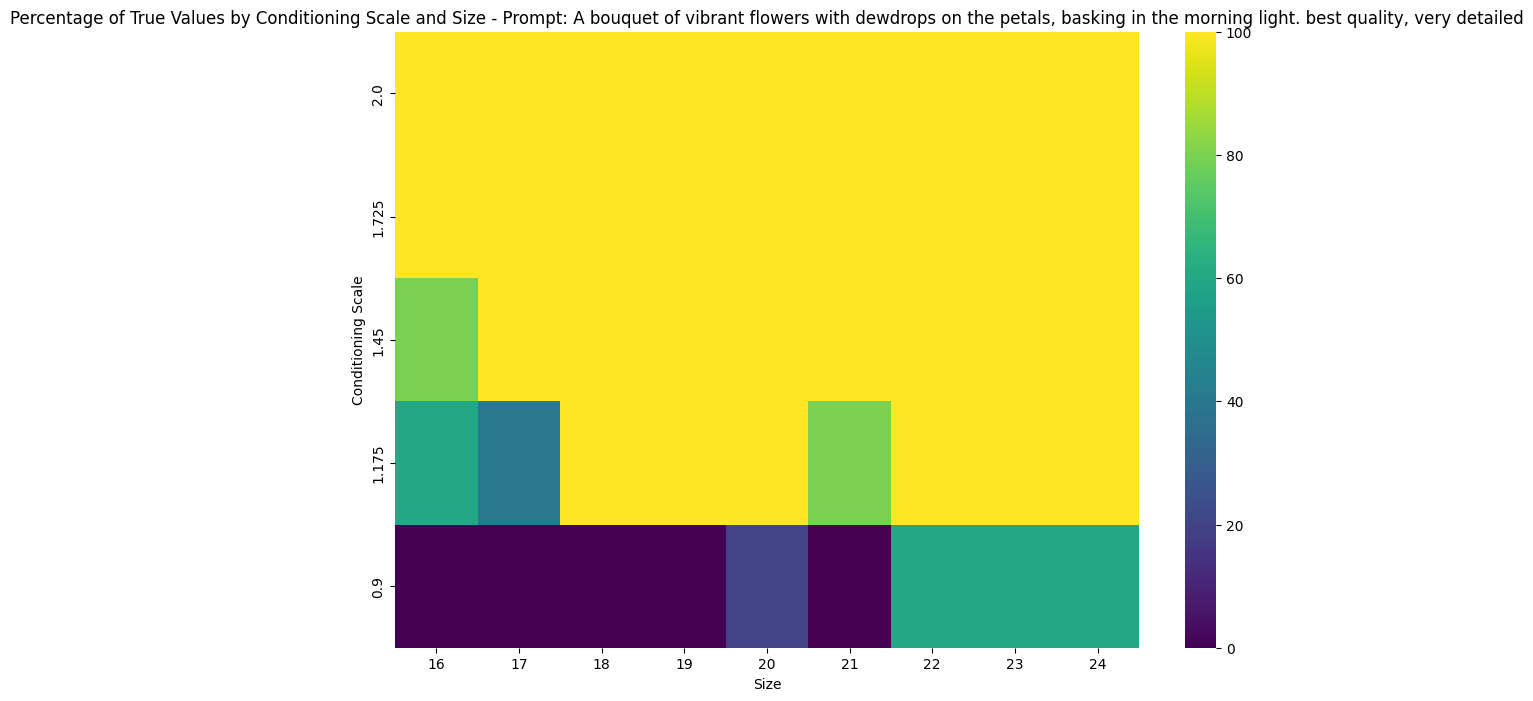

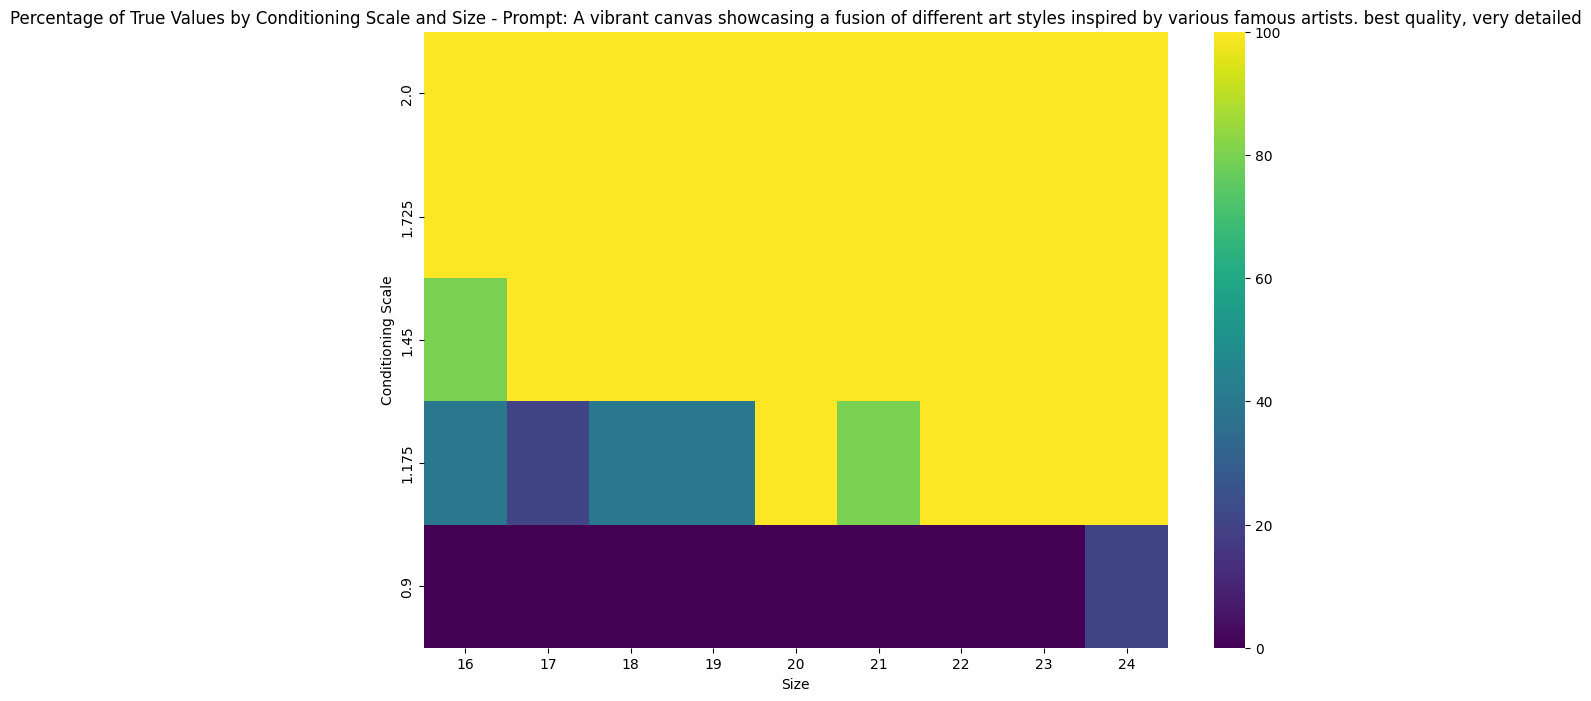

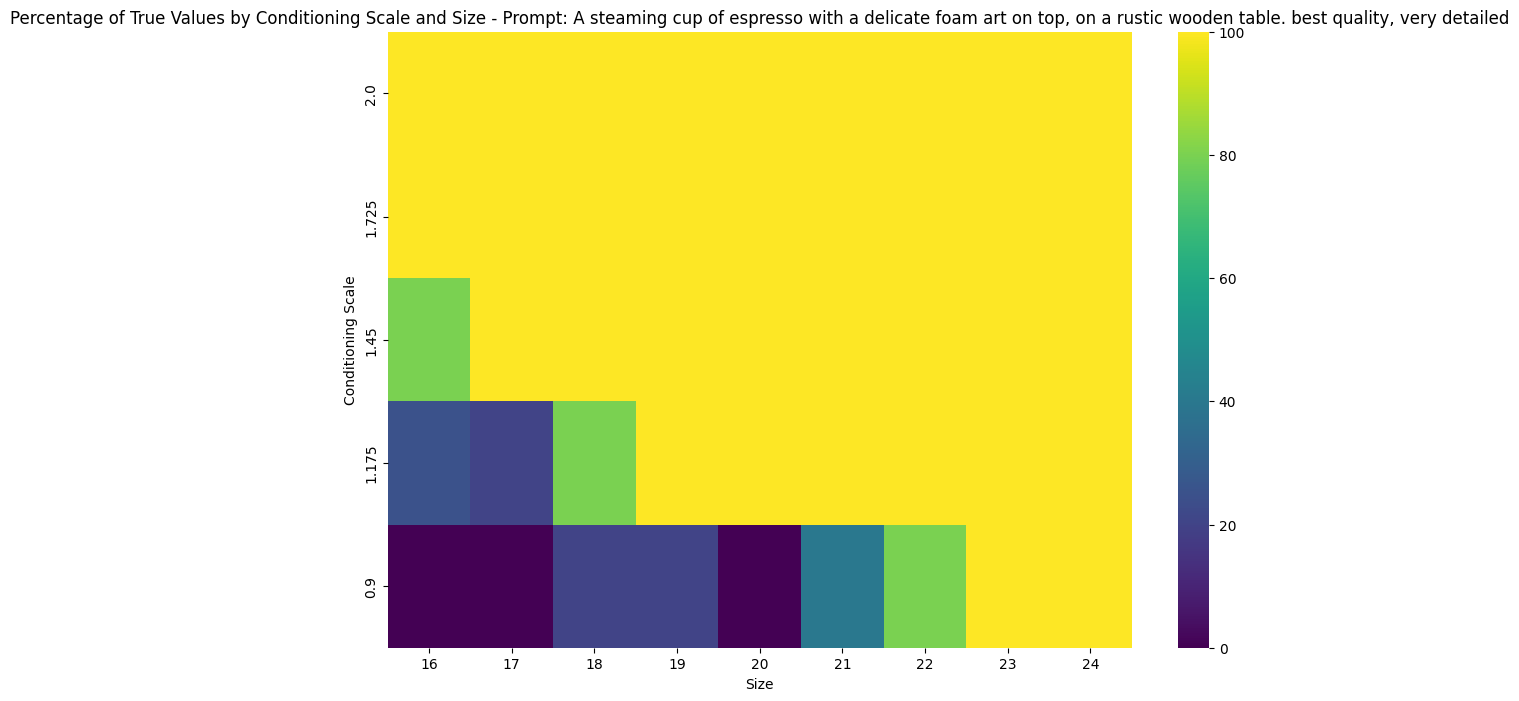

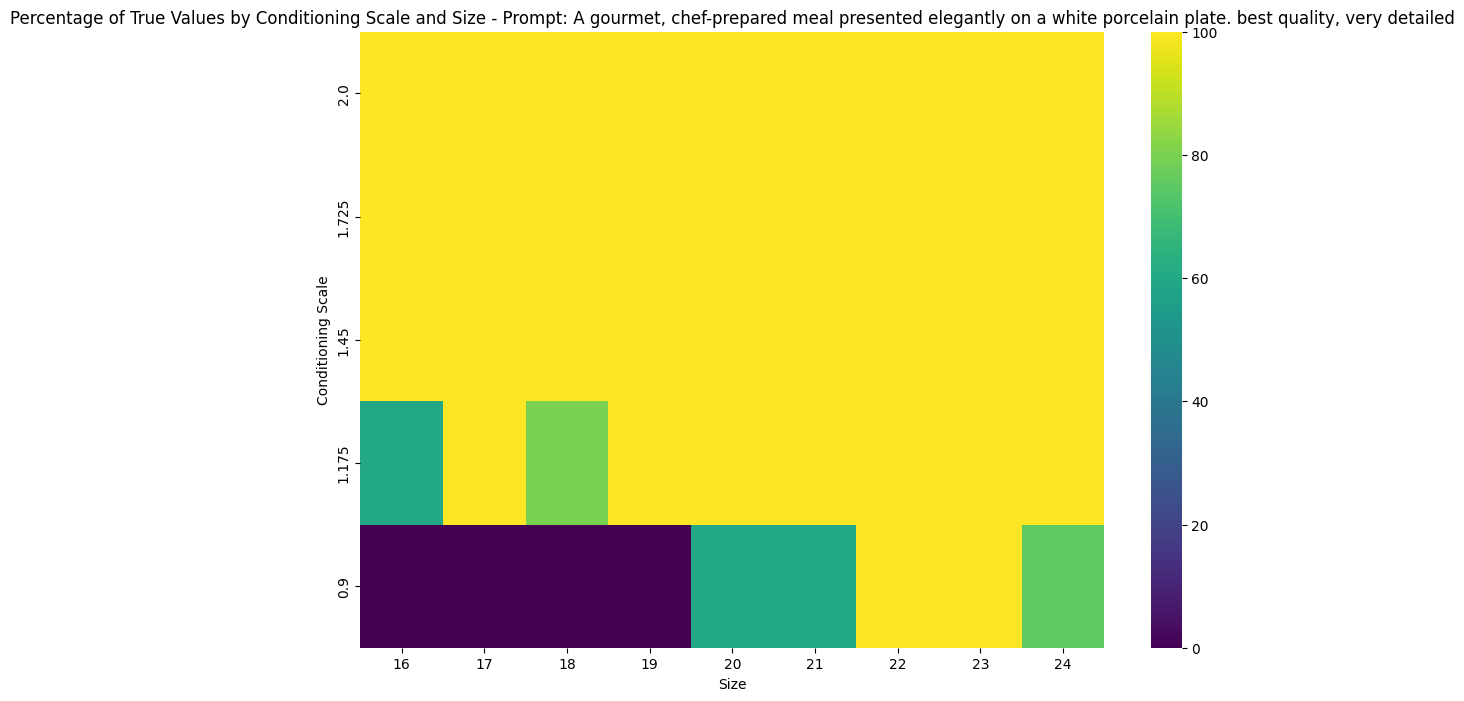

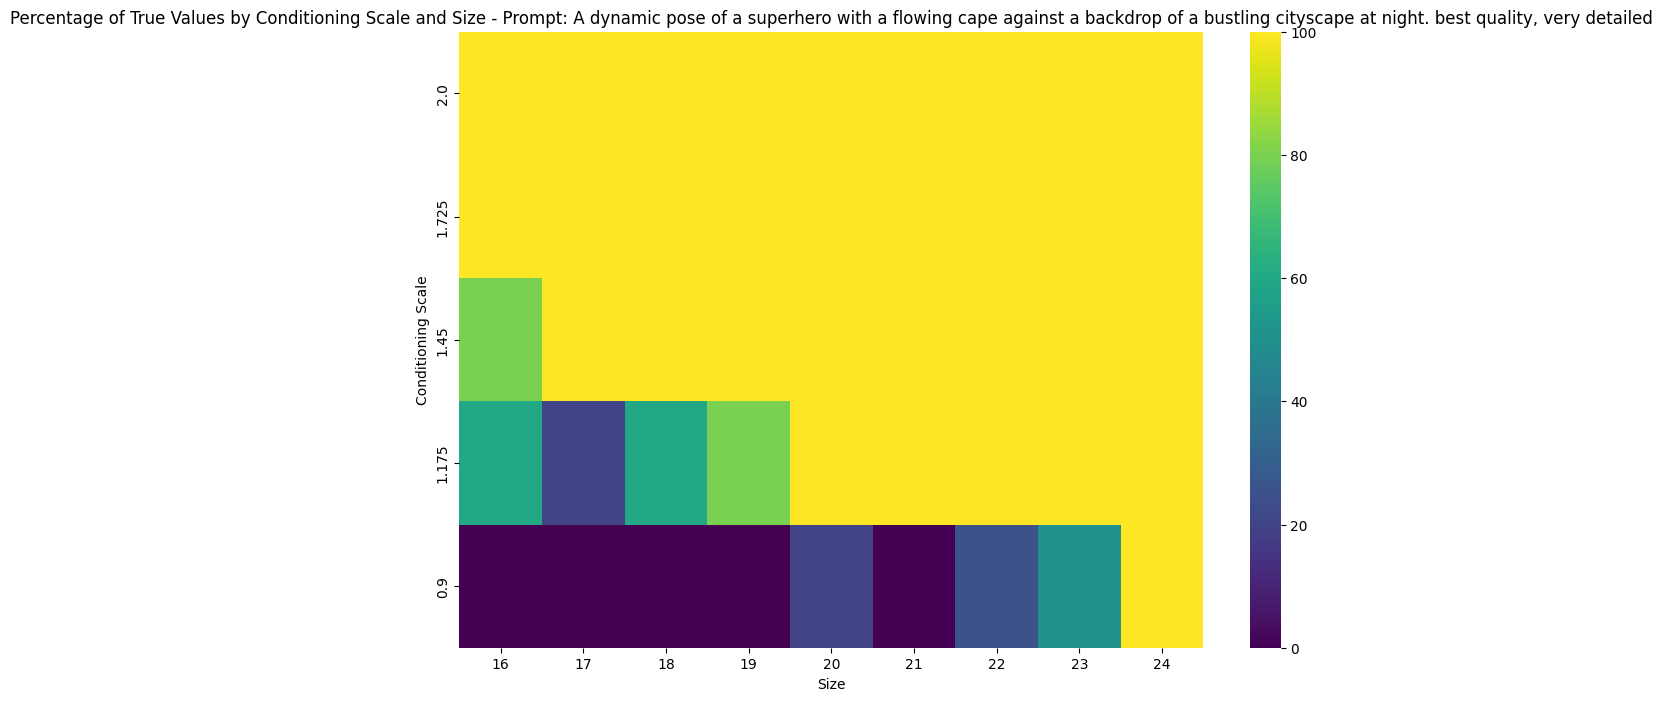

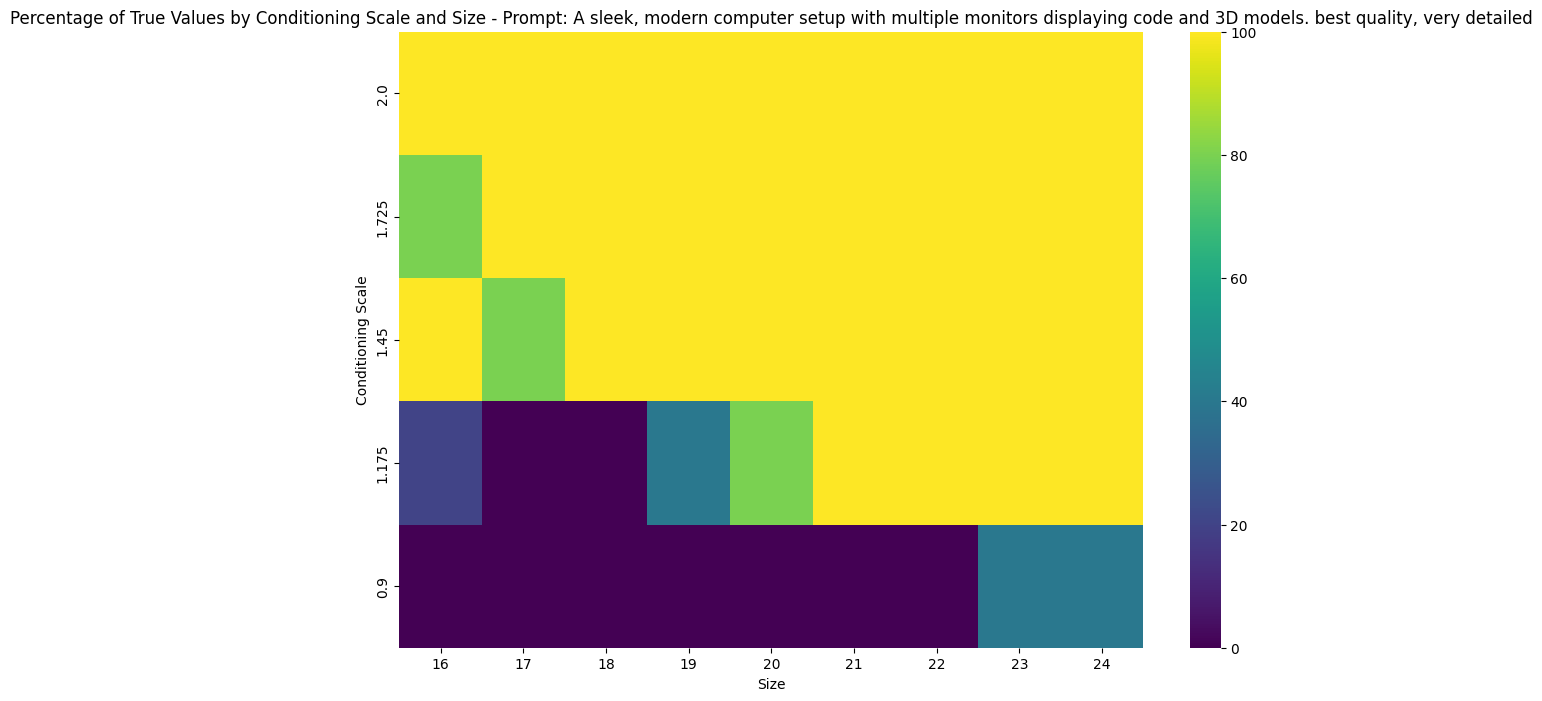

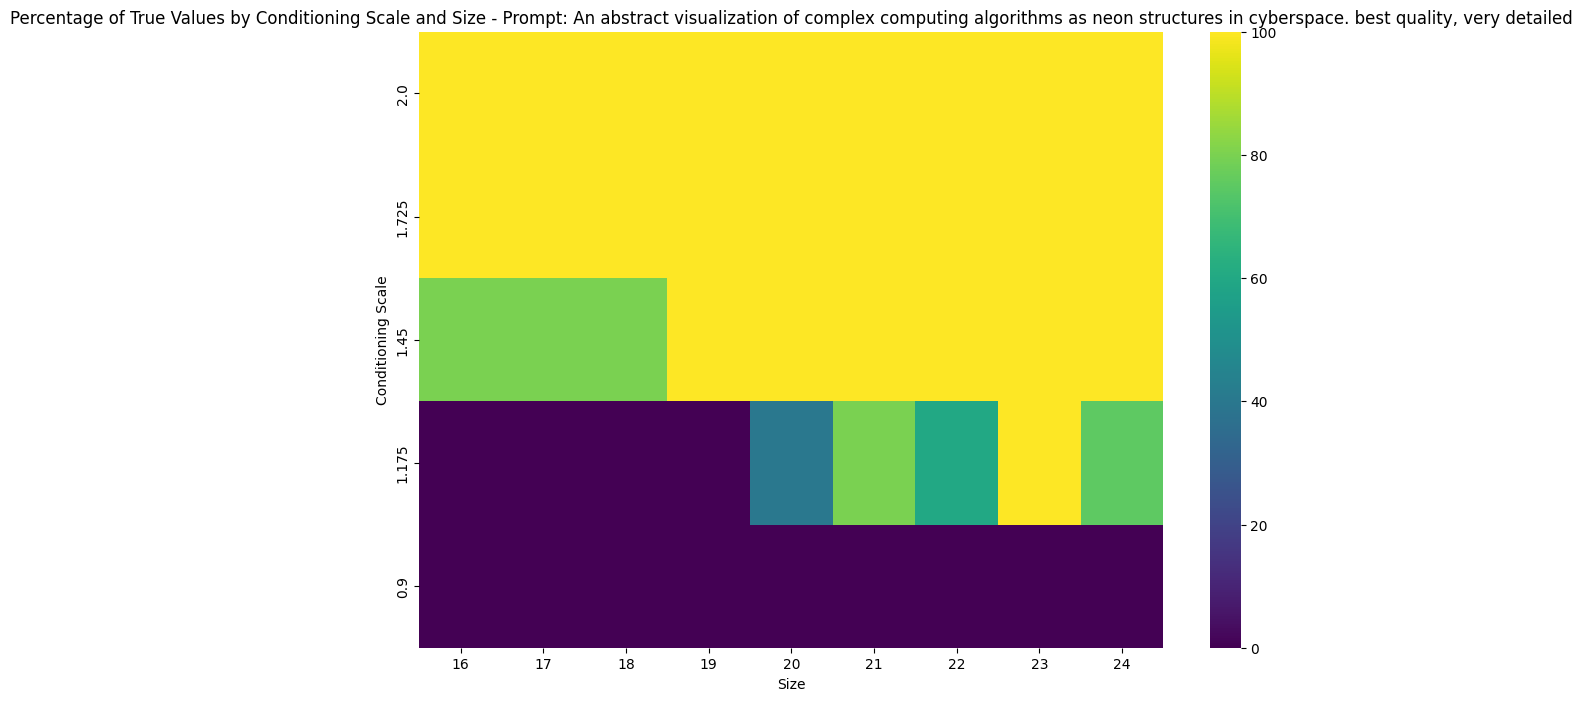

In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the JSON data
json_path = './image_v2_scan_data.json'
with open(json_path) as f:
    json_data = json.load(f)

# Define the column labels
columns = ['prompt', 'conditioning_scale', 'size', 'result']

# Accumulate the data in a list first
data = []
for filename, item in json_data.items():
    data.append([
        item['prompt'],
        round(item['conditioning_scale'], 3) if isinstance(item['conditioning_scale'], float) else item['conditioning_scale'],
        item['size'],
        item['scan_test'] == 'SCAN'
    ])

# Create the DataFrame from the accumulated data
df_full = pd.DataFrame(data, columns=columns)

# Convert conditioning_scale to float for consistency
df_full['conditioning_scale'] = df_full['conditioning_scale'].astype(float)

# Process and plot a heatmap for each unique prompt
for prompt in df_full['prompt'].unique():
    # Filter the DataFrame for the current prompt
    df_filtered = df_full[df_full['prompt'] == prompt]

    # Aggregate the data
    agg_data = df_filtered.groupby(['conditioning_scale', 'size']).agg(
        total=('result', 'count'),
        true_count=('result', 'sum')
    ).reset_index()

    # Calculate the percentage of True values
    agg_data['true_percentage'] = (agg_data['true_count'] / agg_data['total']) * 100

    # Pivot for heatmap
    pivot_table = agg_data.pivot(index='conditioning_scale', columns='size', values='true_percentage')

    # Plotting
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(pivot_table, cmap="viridis", fmt=".0f")
    ax.invert_yaxis()
    plt.title(f'Percentage of True Values by Conditioning Scale and Size - Prompt: {prompt}')
    plt.ylabel('Conditioning Scale')
    plt.xlabel('Size')
    plt.show()
